In [ ]:
!pip install -q torch transformers datasets pandas scikit-learn matplotlib seaborn pyarrow tabulate

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CAFE-Updated

!ls -lah

/content/drive/MyDrive/Colab Notebooks/CAFE-Updated
total 778M
-rw------- 1 root root 3.6K Oct 13 20:03 DeBERTaForToxicity.py
-rw------- 1 root root  14K Oct 14 16:19 evaluate.py
-rw------- 1 root root 1.5K Oct 15 09:48 evaluation_results.csv
-rw------- 1 root root 192K Oct 14 17:01 figure1_score_distributions.png
-rw------- 1 root root  92K Oct 14 17:01 figure2_bpsn_by_identity.png
-rw------- 1 root root  11K Oct 13 20:01 generate_results.py
-rw------- 1 root root 6.5K Oct 13 20:03 JigsawDataset.py
-rw------- 1 root root 7.6K Oct 14 14:14 jigsaw_metrics.py
-rw------- 1 root root 707M Oct 14 12:52 jigsaw_train_preprocessed.parquet
-rw------- 1 root root  39M Oct 14 12:53 jigsaw_val_preprocessed.parquet
drwx------ 2 root root 4.0K Oct 15 08:47 models
drwx------ 2 root root 4.0K Oct 15 08:44 models_
-rw------- 1 root root  12K Oct 13 21:13 preprocessing.py
drwx------ 2 root root 4.0K Oct 14 12:56 __pycache__
-rw------- 1 root root 3.7K Oct 14 13:28 RoBERTaForToxicity.py
-rw------- 1 root

In [ ]:
# 1) Install + set Kaggle (you must have accepted the competition rules)
!pip -q install kaggle datasets
import os
os.makedirs('/root/.kaggle', exist_ok=True)

# Upload your kaggle.json (from Kaggle account → Create New API Token)
from google.colab import files
files.upload()                   # select kaggle.json
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# 2) Download & unzip
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification -p /content/jigsaw
!unzip -q /content/jigsaw/*.zip -d /content/jigsaw

Saving kaggle.json to kaggle.json
100% 721M/723M [00:03<00:00, 143MB/s]
100% 723M/723M [00:03<00:00, 203MB/s]


In [ ]:
!python preprocessing.py

Loading Jigsaw Dataset from Kaggle
✓ Data already exists at /content/jigsaw

Loading data into pandas...
✓ Loaded 1,804,874 training samples

Creating train/validation split (95%/5%)...
  Train: 1,714,630 samples
  Validation: 90,244 samples

Converting to HuggingFace Dataset format...

✓ Dataset loaded successfully!

Preprocessing train split...
Processing train texts: 100% 1714630/1714630 [16:23<00:00, 1743.14it/s]

Preprocessing validation split...
Processing validation texts: 100% 90244/90244 [00:50<00:00, 1772.53it/s]

Saving preprocessed data...

Preprocessing complete!
Train data saved to: jigsaw_train_preprocessed.parquet (1,714,630 samples)
Validation data saved to: jigsaw_val_preprocessed.parquet (90,244 samples)

Sample preprocessed examples:

Original: I'm pretty sure Elway would give more to Os than I would, so my opinion doesn't matter.  Just not big on the guy.  His arm motion stinks (lots of batt
Cleaned:  i am pretty sure elway would give more to os than i would so my 

In [ ]:
import pandas as pd
x=pd.read_parquet('jigsaw_train_preprocessed.parquet')
x.head(2)

In [ ]:
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"Number of GPUs: {torch.cuda.device_count()}")

if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("WARNING: No GPU detected! Check Runtime settings.")

PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA version: 12.6
Number of GPUs: 1
GPU Device: Tesla T4
GPU Memory: 15.83 GB


In [ ]:
!python train_roberta.py

2025-10-15 08:46:32.573537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760517992.606683    1199 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760517992.616441    1199 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760517992.639543    1199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760517992.639597    1199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760517992.639606    1199 computation_placer.cc:177] computation placer alr

In [ ]:
!python evaluate.py

2025-10-15 09:23:17.967367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760520198.160123   10282 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760520198.211941   10282 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760520198.731952   10282 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760520198.732008   10282 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760520198.732016   10282 computation_placer.cc:177] computation placer alr

In [ ]:
!python run_rtp_experiment.py

2025-10-15 09:55:14.358016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760522114.387506   18224 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760522114.397239   18224 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760522114.430901   18224 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760522114.430940   18224 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760522114.430946   18224 computation_placer.cc:177] computation placer alr

In [ ]:
!python generate_results.py

Generating Results for Paper

Loading data...
Loaded 5000 RTP samples

Generating Figure 1: Score Distributions...
✓ Saved to figure1_score_distributions.png

Generating Table 2 and Figure 2: Perspective API Bias Analysis...
✓ Saved table to table2_perspective_bias.md
✓ Saved figure to figure2_bpsn_by_identity.png

Table 2: Perspective API Bias Metrics
                     Identity  Subgroup Size  BPSN AUC  BNSP AUC  Bias Score
                         Male           1151       NaN       NaN         NaN
                       Female            582       NaN       NaN         NaN
                  Transgender             16       NaN       NaN         NaN
                 Heterosexual             11       NaN       NaN         NaN
    Homosexual Gay Or Lesbian             31       NaN       NaN         NaN
                    Christian             26       NaN       NaN         NaN
                       Jewish             17       NaN       NaN         NaN
                       Muslim

In [ ]:
# Or use the automated pipeline:
# !python run_full_pipeline.py

Loading preprocessed data...
Loaded 1,714,630 comments

Creating toxicity distribution charts...
✓ Chart saved as 'jigsaw_toxicity_distribution.png'


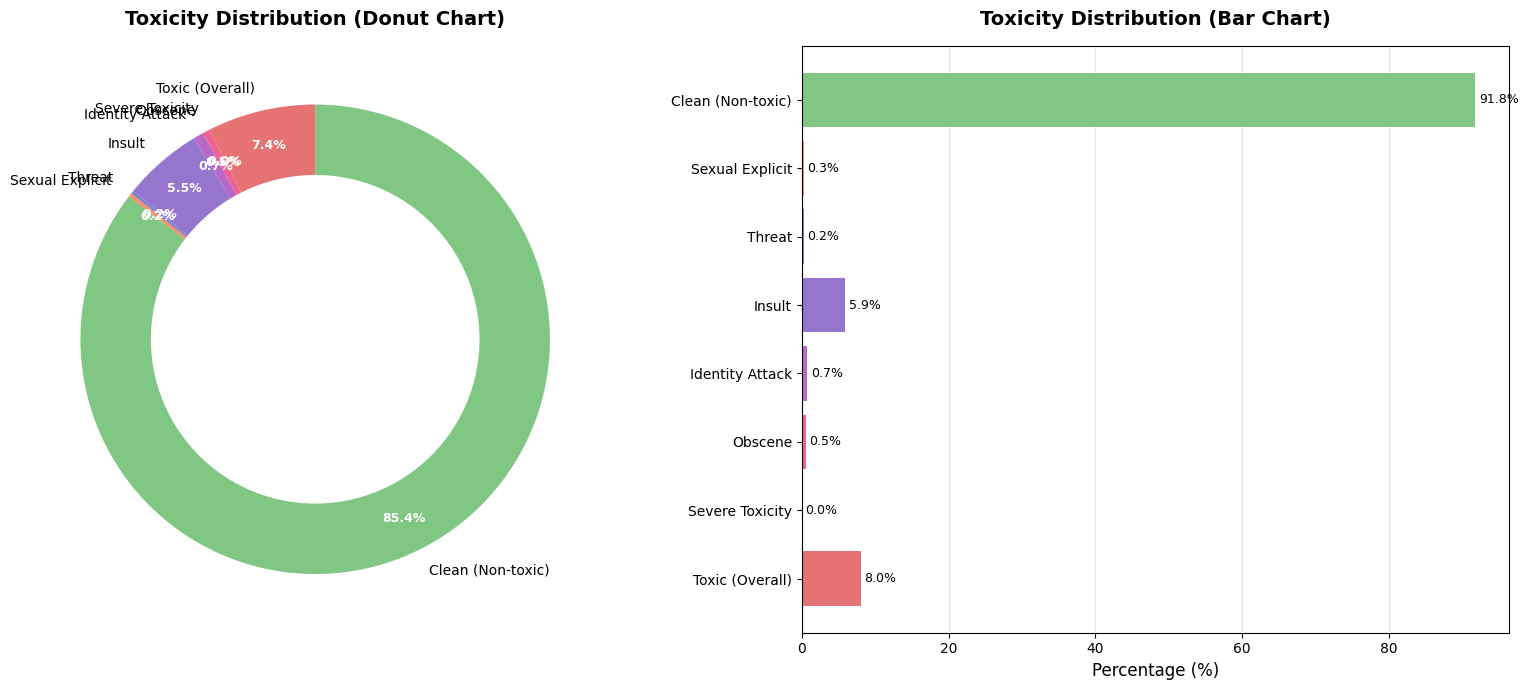


JIGSAW DATASET STATISTICS
Total comments: 1,714,630

Category Breakdown (threshold >= 0.5):
------------------------------------------------------------
  Toxic (Overall)          :   8.00% (137,117 comments)
  Severe Toxicity          :   0.00% (11 comments)
  Obscene                  :   0.53% (9,149 comments)
  Identity Attack          :   0.74% (12,725 comments)
  Insult                   :   5.90% (101,197 comments)
  Threat                   :   0.24% (4,032 comments)
  Sexual Explicit          :   0.26% (4,458 comments)
  Clean (Non-toxic)        :  91.77% (1,573,524 comments)

Creating identity distribution chart...
✓ Identity distribution chart saved as 'jigsaw_identity_distribution.png'


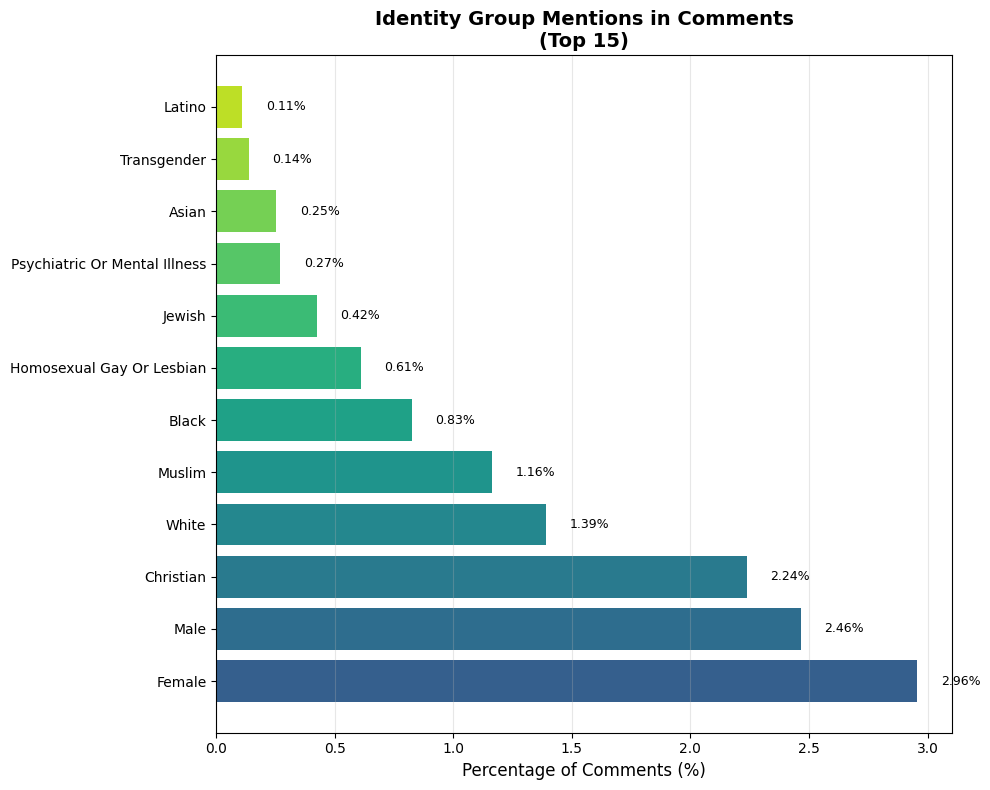


✓ All visualizations complete!

Generated files:
  - jigsaw_toxicity_distribution.png
  - jigsaw_identity_distribution.png


In [ ]:
"""
Jigsaw Dataset Visualization
Creates distribution charts similar to hate speech statistics
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


def create_toxicity_donut_chart(df, output_path='dataset_statistics.png'):
    """
    Create a donut chart showing the distribution of toxicity categories
    in the Jigsaw dataset.

    Args:
        df: DataFrame with toxicity labels (from preprocessing.py)
        output_path: Where to save the chart
    """

    # Define toxicity columns
    toxicity_columns = ['target', 'severe_toxicity', 'obscene',
                        'identity_attack', 'insult', 'threat', 'sexual_explicit']

    # Calculate percentages for each category (threshold >= 0.5 for positive)
    total_comments = len(df)
    percentages = []
    labels = []

    for col in toxicity_columns:
        if col in df.columns:
            # Count comments where toxicity >= 0.5
            pct = (df[col] >= 0.5).sum() / total_comments * 100
            percentages.append(pct)

            # Format labels nicely
            label = col.replace('_', ' ').title()
            if col == 'target':
                label = 'Toxic (Overall)'
            labels.append(label)

    # Add clean (non-toxic) percentage
    # Count comments where ALL toxicity scores < 0.5
    clean_mask = (df[toxicity_columns] < 0.5).all(axis=1)
    clean_pct = clean_mask.sum() / total_comments * 100
    percentages.append(clean_pct)
    labels.append('Clean (Non-toxic)')

    # Colors (similar to your reference image)
    colors = ['#E57373', '#D32F2F', '#F06292', '#BA68C8',
              '#9575CD', '#7986CB', '#FF8A65', '#81C784']

    # Create figure with two subplots
    fig = plt.figure(figsize=(16, 7))

    # Donut chart
    ax1 = plt.subplot(1, 2, 1)
    wedges, texts, autotexts = ax1.pie(
        percentages,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors[:len(percentages)],
        startangle=90,
        pctdistance=0.85,
        textprops={'fontsize': 10}
    )

    # Draw circle in center to make it a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax1.add_artist(centre_circle)

    # Style the percentage text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(9)
        autotext.set_weight('bold')

    ax1.set_title('Toxicity Distribution (Donut Chart)',
                  fontsize=14, fontweight='bold', pad=15)

    # Bar chart for better comparison
    ax2 = plt.subplot(1, 2, 2)
    bars = ax2.barh(labels, percentages, color=colors[:len(percentages)])
    ax2.set_xlabel('Percentage (%)', fontsize=12)
    ax2.set_title('Toxicity Distribution (Bar Chart)',
                  fontsize=14, fontweight='bold', pad=15)
    ax2.grid(axis='x', alpha=0.3)

    # Add percentage labels on bars
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        ax2.text(pct + 0.5, i, f'{pct:.1f}%',
                va='center', fontsize=9)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"✓ Chart saved as '{output_path}'")
    plt.show()

    # Print detailed statistics
    print("\n" + "="*60)
    print("JIGSAW DATASET STATISTICS")
    print("="*60)
    print(f"Total comments: {total_comments:,}")
    print("\nCategory Breakdown (threshold >= 0.5):")
    print("-"*60)
    for label, pct in zip(labels, percentages):
        count = int((pct / 100) * total_comments)
        print(f"  {label:25s}: {pct:6.2f}% ({count:,} comments)")
    print("="*60)


def analyze_identity_groups(df, output_path='identity_distribution.png'):
    """
    Analyze distribution of identity mentions in the dataset.

    Args:
        df: DataFrame with identity columns
        output_path: Where to save the chart
    """

    # Identity columns from Jigsaw dataset
    identity_columns = [
        'male', 'female', 'transgender', 'other_gender',
        'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation',
        'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion',
        'black', 'white', 'asian', 'latino', 'other_race_or_ethnicity',
        'physical_disability', 'intellectual_or_learning_disability',
        'psychiatric_or_mental_illness', 'other_disability'
    ]

    # Filter to columns that exist
    available_identity_cols = [col for col in identity_columns if col in df.columns]

    if not available_identity_cols:
        print("No identity columns found in dataset")
        return

    # Calculate percentages
    total = len(df)
    identity_stats = []

    for col in available_identity_cols:
        pct = (df[col] >= 0.5).sum() / total * 100
        if pct > 0.1:  # Only include identities mentioned in >0.1% of comments
            identity_stats.append({
                'identity': col.replace('_', ' ').title(),
                'percentage': pct
            })

    # Sort by percentage
    identity_stats = sorted(identity_stats, key=lambda x: x['percentage'], reverse=True)

    # Create chart
    if identity_stats:
        identities = [stat['identity'] for stat in identity_stats[:15]]  # Top 15
        percentages = [stat['percentage'] for stat in identity_stats[:15]]

        fig, ax = plt.subplots(figsize=(10, 8))
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(identities)))
        bars = ax.barh(identities, percentages, color=colors)

        ax.set_xlabel('Percentage of Comments (%)', fontsize=12)
        ax.set_title('Identity Group Mentions in Comments\n(Top 15)',
                    fontsize=14, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)

        # Add percentage labels
        for bar, pct in zip(bars, percentages):
            ax.text(pct + 0.1, bar.get_y() + bar.get_height()/2,
                   f'{pct:.2f}%', va='center', fontsize=9)

        plt.tight_layout()
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"✓ Identity distribution chart saved as '{output_path}'")
        plt.show()


def main():
    """
    Main function to create all visualizations.
    Run this after preprocessing.py completes.
    """

    # Check if preprocessed data exists
    train_file = 'jigsaw_train_preprocessed.parquet'

    if not os.path.exists(train_file):
        print(f"Error: {train_file} not found!")
        print("Please run 'python preprocessing.py' first to generate the data.")
        return

    print("Loading preprocessed data...")
    df = pd.read_parquet(train_file)
    print(f"Loaded {len(df):,} comments\n")

    # Create toxicity distribution chart
    print("Creating toxicity distribution charts...")
    create_toxicity_donut_chart(df, 'jigsaw_toxicity_distribution.png')

    # Create identity distribution chart
    print("\nCreating identity distribution chart...")
    analyze_identity_groups(df, 'jigsaw_identity_distribution.png')

    print("\n✓ All visualizations complete!")
    print("\nGenerated files:")
    print("  - jigsaw_toxicity_distribution.png")
    print("  - jigsaw_identity_distribution.png")


if __name__ == "__main__":
    main()